In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 12 INTRO TO CLASSIFICATION DAY2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 2: Directory settings  ####

# Set `main_dir` to the location of your `af-werx` folder (for Mac).
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"




In [2]:
#=================================================-
#### Slide 3: Loading packages  ####

# Helper packages.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# Scikit-learn package for logistic regression.
from sklearn import linear_model
# Model set up and tuning packages from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Scikit-learn packages for evaluating model performance.
from sklearn import metrics
# Scikit-learn package for data preprocessing.
from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/af-werx/data


In [4]:
#=================================================-
#### Slide 18: Load the dataset  ####

household_poverty = pd.read_csv("costa_rica_poverty.csv")
household_poverty.head()



,household_id,ind_id,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,...,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,age,Target,monthly_rent
0,21eb7fcc1,ID_279628684,3,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,43,4,190000.0
1,0e5d7a658,ID_f29eb3ddd,4,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,67,4,135000.0
2,2c7317ea8,ID_68de51c94,8,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,92,4,NaN
3,2b58d945f,ID_d671db89c,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,17,4,180000.0
4,2b58d945f,ID_d56d6f5f5,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,37,4,180000.0


In [5]:
#=================================================-
#### Slide 20: Subsetting data  ####

household_logistic = household_poverty.drop(['household_id', 'ind_id', 'monthly_rent'], axis = 1)



In [6]:
#=================================================-
#### Slide 21: The data at first glance  ####

# The data types.
print(household_logistic.dtypes.head())
print(household_logistic['Target'].value_counts())



rooms             int64
tablet            int64
males_under_12    int64
males_over_12     int64
males_tot         int64
dtype: object
4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


In [7]:
#=================================================-
#### Slide 22: Converting the target variable  ####

household_logistic['Target'] = np.where(household_logistic['Target'] <= 3, 'vulnerable', 'non_vulnerable')
print(household_logistic['Target'].head())



0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object


In [8]:
#=================================================-
#### Slide 23: Data prep: check for NAs  ####

# Check for NAs.
print(household_logistic.isnull().sum().head())



rooms             0
tablet            0
males_under_12    0
males_over_12     0
males_tot         0
dtype: int64


In [9]:
#=================================================-
#### Slide 24: Data prep: numeric variables  ####

print(household_logistic.dtypes.head())



rooms             int64
tablet            int64
males_under_12    int64
males_over_12     int64
males_tot         int64
dtype: object


In [10]:
#=================================================-
#### Slide 25: Data prep: target  ####

print(household_logistic.Target.dtypes)
household_logistic["Target"] = np.where(household_logistic["Target"] == "non_vulnerable", True, False)

# Check class again.
print(household_logistic.Target.dtypes)



object
bool


In [12]:
#=================================================-
#### Slide 26: Split into train and test set  ####

# Separate predictors from data.
X = household_logistic[['rooms', 'num_adults']]

# Separate target from data.
y = np.array(household_logistic['Target'])
# Set the seed.
np.random.seed(1)

# Split data into training and test sets, use a 70 test - 30 train split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3
)

In [13]:
#=================================================-
#### Slide 28: Logistic regression: build  ####

# Set up logistic regression model.
logistic_regression_model = linear_model.LogisticRegression()
print(logistic_regression_model)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [14]:
#=================================================-
#### Slide 30: Logistic regression: fit  ####

# Fit the model.
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#=================================================-
#### Slide 32: Logistic regression: predict  ####

# Predict on test data.
predicted_values = logistic_regression_model.predict(X_test)
print(predicted_values)



[ True  True  True ...  True False  True]


In [ ]:
#=================================================-
#### Slide 34: Exercise 1  ####





In [16]:
#=================================================-
#### Slide 41: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)

# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)



[[ 178  884]
 [ 161 1645]]
Accuracy on test data:  0.6356345885634589


In [18]:
#=================================================-
#### Slide 42: Classification report  ####

# Create a list of target names to interpret class assignments.
target_names = ['vulnerable', 'non_vulnerable']
# Print an entire classification report.
class_report = metrics.classification_report(
    y_test,
    predicted_values,
    target_names = target_names
)
print(class_report)



                precision    recall  f1-score   support

    vulnerable       0.53      0.17      0.25      1062
non_vulnerable       0.65      0.91      0.76      1806

     micro avg       0.64      0.64      0.64      2868
     macro avg       0.59      0.54      0.51      2868
  weighted avg       0.60      0.64      0.57      2868



In [19]:
#=================================================-
#### Slide 43: Classification report (cont'd)  ####

print(class_report)



                precision    recall  f1-score   support

    vulnerable       0.53      0.17      0.25      1062
non_vulnerable       0.65      0.91      0.76      1806

     micro avg       0.64      0.64      0.64      2868
     macro avg       0.59      0.54      0.51      2868
  weighted avg       0.60      0.64      0.57      2868



In [20]:
#=================================================-
#### Slide 44: Add accuracy score to the final scores  ####

model_final = pickle.load(open("model_final.sav","rb"))
model_final = model_final.append({'metrics' : "accuracy" ,
'values' : round(test_accuracy_score,4),
'model':'logistic' } ,
ignore_index = True)
print(model_final)



    metrics  values             model
0  accuracy  0.6046             knn_5
1  accuracy  0.6188  knn_GridSearchCV
2  accuracy  0.6287            knn_29
3  accuracy  0.6287            knn_29
4  accuracy  0.6356          logistic


In [21]:
#=================================================-
#### Slide 45: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = logistic_regression_model.predict_proba(X_test)
print(test_probabilities[0:5, :])
# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]
print(test_predictions[0:5])



[[0.28499409 0.71500591]
 [0.37610379 0.62389621]
 [0.1624945  0.8375055 ]
 [0.52817721 0.47182279]
 [0.35197966 0.64802034]]
[0.71500591 0.62389621 0.8375055  0.47182279 0.64802034]


In [23]:
#=================================================-
#### Slide 46: Computing FPR, TPR, and threshold  ####

# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test,            #<- test data labels
                                        test_predictions)  #<- predicted probabilities
print("False positive: ", fpr[:5])
print("True positive: ", tpr[:5])
print("Threshold: ", threshold)



False positive:  [0.        0.        0.        0.        0.0047081]
True positive:  [0.         0.00387597 0.00609081 0.01052049 0.01162791]
Threshold:  [1.92921126 0.92921126 0.91446334 0.90567607 0.89668599 0.8963877
 0.88694602 0.88662316 0.8862995  0.87606563 0.87571606 0.86429832
 0.86392071 0.85160299 0.85119613 0.83794266 0.8375055  0.82375316
 0.8232858  0.80810685 0.80760769 0.79195359 0.79142325 0.79089191
 0.77481946 0.77425789 0.77369533 0.7555217  0.75492723 0.73576116
 0.73513548 0.71566074 0.71500591 0.69398332 0.69329996 0.67141205
 0.6707022  0.64948592 0.64875348 0.64802034 0.6246505  0.62389621
 0.59991354 0.59914145 0.57465642 0.5497996  0.54900351 0.5238896
 0.52308743 0.49785037 0.47182279 0.44674219 0.44594751 0.42114563
 0.39596603 0.37207716 0.37132615 0.34806721 0.32480519 0.30237674
 0.28085282]


In [24]:
#=================================================-
#### Slide 47: Computing AUC  ####

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)



Area under the ROC curve:  0.6440758780628705


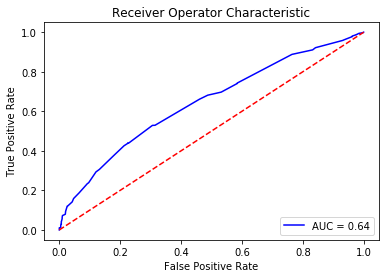

In [25]:
#=================================================-
#### Slide 48: Putting it all together: ROC plot  ####

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [ ]:
#=================================================-
#### Slide 50: Exercise 2  ####





In [26]:
#=================================================-
#### Slide 52: Working with categorical variables  ####

print(household_logistic.age.head())
household_logistic['age'] = np.where(household_logistic['age'] <= 30, "30 or Below",
                                     np.where(household_logistic['age'] < 60, 'Between 30 and 60', '60 and above'))




0    43
1    67
2    92
3    17
4    37
Name: age, dtype: int64


In [27]:
#=================================================-
#### Slide 53: Working with categorical variables  ####

household_logistic.age.value_counts()



30 or Below          4655
Between 30 and 60    3495
60 and above         1407
Name: age, dtype: int64

In [28]:
#=================================================-
#### Slide 57: Transform `age` into dummies  ####

# Convert 'age' into dummy variables.
age_dummy = pd.get_dummies(household_logistic['age'], drop_first = True)
print(age_dummy.head())



   60 and above  Between 30 and 60
0             0                  1
1             1                  0
2             1                  0
3             0                  0
4             0                  1


In [29]:
#=================================================-
#### Slide 58: Transform `age` into dummies  ####

# Drop `age` from the data.
household_logistic.drop(['age'], axis = 1, inplace = True)
# Concatenate `age_dummy` to our dataset.
household_logistic = pd.concat([household_logistic,age_dummy],axis=1)
household_logistic.head()



,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,ppl_under_12,ppl_over_12,...,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,Target,60 and above,Between 30 and 60
0,3,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,True,0,1
1,4,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,True,1,0
2,8,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,True,1,0
3,5,1,0,2,2,1,1,2,1,3,...,0,0,0,0,0,1,0,True,0,0
4,5,1,0,2,2,1,1,2,1,3,...,0,0,0,0,0,1,0,True,0,1


In [30]:
#=================================================-
#### Slide 60: Split into train and test set  ####

# Separate predictors from data.
# We can just drop the target variable, as we are using all other variables as predictors.
X = household_logistic.drop('Target', axis = 1)


# Separate target from data.
y = np.array(household_logistic['Target'])
# Set the seed.
np.random.seed(1)
# Split data into training and test sets, use a 70 train - 30 test split.
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = .3)




In [31]:
#=================================================-
#### Slide 61: Logistic regression: build  ####

# Set up the logistic regression model.
logistic_regression_model = linear_model.LogisticRegression()
print(logistic_regression_model)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [32]:
#=================================================-
#### Slide 62: Logistic regression: fit  ####

# Fit the model.
logistic_regression_model.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
#=================================================-
#### Slide 63: Logistic regression: predict  ####

# Predict on test data.
predicted_values = logistic_regression_model.predict(X_test)
print(predicted_values)



[ True False  True ...  True False False]


In [34]:
#=================================================-
#### Slide 64: Confusion matrix and accuracy  ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)



[[ 687  375]
 [ 243 1563]]
Accuracy on test data:  0.7845188284518828


In [36]:
#=================================================-
#### Slide 65: Add accuracy score to the final scores  ####

model_final = model_final.append({
    'metrics' : "accuracy" ,
    'values' : round(test_accuracy_score,4),
    'model':'logistic_whole_dataset'} ,
    ignore_index = True)
print(model_final)



    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6188        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6287                  knn_29
4  accuracy  0.6356                logistic
5  accuracy  0.7845  logistic_whole_dataset


In [35]:
#=================================================-
#### Slide 66: Accuracy on train vs. accuracy on test  ####

# Compute trained model accuracy score.
trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)



Accuracy on train data:  0.7806847062341157


In [ ]:
#=================================================-
#### Slide 68: Exercise 3  ####





In [37]:
#=================================================-
#### Slide 80: Prepare parameters for optimization  ####

# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)



Regularization constant:  [1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]
{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]), 'penalty': ['l1', 'l2']}


In [47]:
#=================================================-
#### Slide 81: Set up cross-validation logistic function  ####

# Grid search 10-fold cross-validation with above parameters.
clf = GridSearchCV(
    linear_model.LogisticRegression(), #<- function to optimize
    hyperparameters,                   #<- grid search parameters
    cv = 10,                           #<- 10-fold cv
    verbose = 0)                       #<- no messages to show
# Fit CV grid search.
best_model = clf.fit(X_train, y_train)
best_modelb



KeyboardInterrupt: 

In [50]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=1),    #<- 10-fold cv random shuffle

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1, test_size=0.1, train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 1.29155e+01, 1.66810e+02, 2.15443e+03, 2.78256e+04,
       3.59381e+05, 4.64159e+06, 5.99484e+07, 7.74264e+08, 1.00000e+10]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
#=================================================-
#### Slide 82: Check best parameters found by CV  ####

# Get best penalty and constant parameters.
penalty = best_model.best_estimator_.get_params()['penalty']
constant = best_model.best_estimator_.get_params()['C']
print('Best penalty: ', penalty)
print('Best C: ', constant)



Best penalty:  l2
Best C:  4641588.833612782


In [53]:
#=================================================-
#### Slide 83: Predict using the best model parameters  ####

# Predict on test data using best model.
best_predicted_values = best_model.predict(X_test)
print(best_predicted_values)
# Compute best model accuracy score.
best_accuracy_score = metrics.accuracy_score(y_test, best_predicted_values)
print("Accuracy on test data (best model): ", best_accuracy_score)



[ True False  True ...  True False False]
Accuracy on test data (best model):  0.7855648535564853


In [54]:
#=================================================-
#### Slide 84: Predict using the best model parameters (cont'd)  ####

# Compute confusion matrix for best model.
best_confusion_matrix = metrics.confusion_matrix(y_test, best_predicted_values)
print(best_confusion_matrix)
# Create a list of target names to interpret class assignments.
target_names = ['Low value', 'High value']
# Compute classification report for best model.
best_class_report = metrics.classification_report(y_test, best_predicted_values,
target_names = target_names)
print(best_class_report)



[[ 688  374]
 [ 241 1565]]
              precision    recall  f1-score   support

   Low value       0.74      0.65      0.69      1062
  High value       0.81      0.87      0.84      1806

   micro avg       0.79      0.79      0.79      2868
   macro avg       0.77      0.76      0.76      2868
weighted avg       0.78      0.79      0.78      2868



In [42]:
#=================================================-
#### Slide 85: Add accuracy score to the final scores  ####

model_final = model_final.append({'metrics' : "accuracy",
'values' : round(best_accuracy_score, 4),
'model':'logistic_tuned' } ,
ignore_index = True)
print(model_final)
pickle.dump(model_final, open("model_final_logistic.sav", "wb" ))



    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6188        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6287                  knn_29
4  accuracy  0.6356                logistic
5  accuracy  0.7845  logistic_whole_dataset
6  accuracy  0.7859          logistic_tuned


In [43]:
#=================================================-
#### Slide 86: Get metrics for ROC curve  ####

# Get probabilities instead of predicted values.
best_test_probabilities = best_model.predict_proba(X_test)
print(best_test_probabilities[0:5, ])
# Get probabilities of test predictions only.
best_test_predictions = best_test_probabilities[:, 1]
print(best_test_predictions[0:5])



[[0.0446763  0.9553237 ]
 [0.82715447 0.17284553]
 [0.28190006 0.71809994]
 [0.35725272 0.64274728]
 [0.01030444 0.98969556]]
[0.9553237  0.17284553 0.71809994 0.64274728 0.98969556]


In [43]:
#=================================================-
#### Slide 87: Get metrics for ROC curve (cont'd)  ####

# Get ROC curve metrics.
best_fpr, best_tpr, best_threshold = metrics.roc_curve(y_test, best_test_predictions)
best_auc = metrics.auc(best_fpr, best_tpr)
print(best_auc)



0.8548685799375589


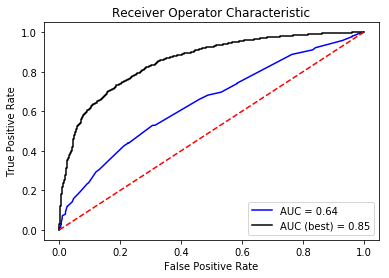

In [44]:
#=================================================-
#### Slide 88: Plot ROC curve for both models  ####

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'blue',
label = 'AUC = %0.2f'%auc)
plt.plot(best_fpr, best_tpr, 'black',
label = 'AUC (best) = %0.2f'%best_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


